In [1]:
import numpy as np
from mayavi import mlab

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [2]:
mlab.init_notebook()

Notebook initialized with ipy backend.


In [3]:
mlab.clf()
x, y = np.mgrid[-10:10:100j, -10:10:100j]
r = np.sqrt(x**2 + y**2)
z = np.sin(r)/r
mlab.surf(z, warp_scale='auto')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [4]:
mlab.clf()
x, y, z = np.mgrid[-5:5:64j, -5:5:64j, -5:5:64j]
values = x*x*0.5 + y*y + z*z*2.0
mlab.contour3d(values)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [5]:

from numpy import linspace, meshgrid, array, sin, cos, pi, abs
from scipy.special import sph_harm
from mayavi import mlab

theta_1d = linspace(0,   pi,  91) 
phi_1d   = linspace(0, 2*pi, 181)

theta_2d, phi_2d = meshgrid(theta_1d, phi_1d)
xyz_2d = array([sin(theta_2d) * sin(phi_2d),
                sin(theta_2d) * cos(phi_2d),
                cos(theta_2d)]) 
l = 3
m = 0

Y_lm = sph_harm(m, l, phi_2d, theta_2d)
r = abs(Y_lm.real) * xyz_2d

mlab.clf()
mlab.figure(size=(800, 400))
mlab.mesh(r[0], r[1], r[2], scalars=Y_lm.real, colormap="cool")
# mlab.view(azimuth=0, elevation=75, distance=2.4, roll=-50)
# mlab.show(stop=True)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\x90\x08\x02\x00\x00\x00\xd9G\x93c\x…

In [6]:
import numpy
from mayavi.mlab import *

def test_surf():
    """Test surf on regularly spaced co-ordinates like MayaVi."""
    def f(x, y):
        sin, cos = np.sin, np.cos
        return sin(x + y) + sin(2 * x - y) + cos(3 * x + 4 * y)

    x, y = np.mgrid[-7.:7.05:0.1, -5.:5.05:0.05]
    s = surf(x, y, f)
    #cs = contour_surf(x, y, f, contour_z=0)
    return s

mlab.clf()
test_surf()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\x90\x08\x02\x00\x00\x00\xd9G\x93c\x…

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mayavi import mlab

# generate data
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
mx, my = np.meshgrid(x, y, indexing='ij')
mz1 = np.abs(mx) + np.abs(my)
mz2 = mx ** 2 + my ** 2

def v1_matplotlib():

    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    surf1 = ax.plot_surface(mx, my, mz1, cmap='winter')
    surf2 = ax.plot_surface(mx, my, mz2, cmap='autumn')
    ax.view_init(azim=60, elev=16)
    plt.show()

def v2_mayavi():
    
    # fig = mlab.figure()

    ax_ranges = [-2, 2, -2, 2, 0, 8]
    ax_scale = [1.0, 1.0, 0.4]
    ax_extent = ax_ranges * np.repeat(ax_scale, 2)

    surf3 = mlab.surf(mx, my, mz1, colormap='Blues')
    surf4 = mlab.surf(mx, my, mz2, colormap='Oranges', warp_scale='auto')

    # surf3.actor.actor.scale = ax_scale
    # surf4.actor.actor.scale = ax_scale
    # mlab.view(60, 74, 17, [-2.5, -4.6, -0.3])
    # mlab.outline(surf3, color=(.7, .7, .7), extent=ax_extent)
    # mlab.axes(surf3, color=(.7, .7, .7), extent=ax_extent,
    #           ranges=ax_ranges,
    #           xlabel='x', ylabel='y', zlabel='z')

    # if transparency:
    #     surf3.actor.property.opacity = 0.5
    #     surf4.actor.property.opacity = 0.5
    #     fig.scene.renderer.use_depth_peeling = 1


In [12]:
mlab.clf()
mlab.surf(mx, my, mz1, colormap='Blues')
mlab.surf(mx, my, mz2, colormap='Oranges')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\x90\x08\x02\x00\x00\x00\xd9G\x93c\x…

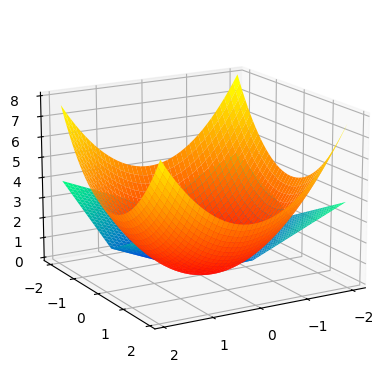

In [10]:
v1_matplotlib()

In [17]:
# https://stackoverflow.com/questions/70640118/i-cant-animate-a-surface-with-mayavi

# import numpy as np
# from mayavi import mlab

# def evolving_function(X, Y, t, Lx=1, Ly=1):
#     return np.sin(X+Lx*t)*np.sin(Y+Ly*t)

# Lx, Ly = 1,2

# x = np.linspace(-10,10,100)
# y = np.linspace(-10,10,100)
# X,Y = np.meshgrid(x,y)
# X, Y = X.T, Y.T
# s = evolving_function(X, Y, 0, Lx=Lx, Ly=Ly)

# m = mlab.surf(X, Y, s)

# dt = 50
# t = 10
# steps = int(10*1000/dt)

# @mlab.animate(delay=dt)
# def anim():
#      for i in range(1,steps):
#          m.mlab_source.scalars = evolving_function(X, Y, dt*i, Lx=Lx, Ly=Ly)
#          yield

# anim()
# mlab.show()

AttributeError: 'Timer' object has no attribute 'start'